In [1]:
from networks import *

In [2]:
bnn_val = load_product('val', 'BANANAS')
bnn_val.head()

,Unnamed: 0.1,Unnamed: 0,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,...,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,spread,lr
1,1,1,1,0,BANANAS,4871,9,4870.0,23.0,NaN,...,4877,23,NaN,NaN,NaN,NaN,4874.0,0.000000,6,0.000410
4,4,4,1,100,BANANAS,4875,1,4871.0,4.0,4870.0,...,4877,22,NaN,NaN,NaN,NaN,4876.0,0.000000,2,-0.000615
8,8,8,1,200,BANANAS,4870,22,NaN,NaN,NaN,...,4876,22,NaN,NaN,NaN,NaN,4873.0,1.966309,6,0.000205
12,12,12,1,300,BANANAS,4873,1,4868.0,26.0,NaN,...,4875,26,NaN,NaN,NaN,NaN,4874.0,8.063477,2,-0.000718
17,17,17,1,400,BANANAS,4870,8,4869.0,28.0,NaN,...,4871,5,4875.0,28.0,NaN,NaN,4870.5,8.017578,1,0.000821


In [3]:
features = ['spread', 'lr', 'bid_volume_1', 'ask_volume_1']
target = ['lr']
back_length = 20
forward_length = 10

In [4]:
ds = DL(bnn_val, features, target, back_length, forward_length)
valloader = next(iter(DataLoader(ds, batch_size=len(ds), num_workers=2, shuffle=False)))

In [5]:
model = Net.load_from_checkpoint('lightning_logs/version_8/checkpoints/epoch=14-step=4695.ckpt')

In [6]:
out = model(valloader[0])

torch.Size([9970, 10])

In [7]:
out = out.detach().numpy()

In [8]:
bnn_val['pred'] = [0.0] * 10000
bnn_val['pred'].iloc[back_length:-forward_length] = out[:, 0]

C:\Users\Lei\AppData\Local\Temp\ipykernel_19576\3012238300.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bnn_val['pred'].iloc[back_length:-forward_length] = out[:, 0]


In [11]:
bnn_val[back_length:-forward_length]

,Unnamed: 0.1,Unnamed: 0,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,...,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,spread,lr,pred
83,83,83,1,2000,BANANAS,4868,23,NaN,NaN,NaN,...,23,NaN,NaN,NaN,NaN,4871.5,33.265625,7,0.000000,0.540915
84,84,84,1,2100,BANANAS,4868,28,NaN,NaN,NaN,...,28,NaN,NaN,NaN,NaN,4871.5,34.242188,7,0.000000,0.492036
90,90,90,1,2200,BANANAS,4868,21,NaN,NaN,NaN,...,21,NaN,NaN,NaN,NaN,4871.5,32.703125,7,-0.000411,0.572494
93,93,93,1,2300,BANANAS,4868,24,NaN,NaN,NaN,...,1,4874.0,2.0,4875.0,22.0,4869.5,42.984375,3,0.000308,0.506665
99,99,99,1,2400,BANANAS,4868,22,NaN,NaN,NaN,...,2,4875.0,20.0,NaN,NaN,4871.0,46.851562,6,0.000000,0.509965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39940,39940,39940,1,998500,BANANAS,4820,26,NaN,NaN,NaN,...,26,NaN,NaN,NaN,NaN,4823.5,96800.000000,7,0.000000,0.551115
39946,39946,39946,1,998600,BANANAS,4821,10,4820.0,23.0,NaN,...,23,NaN,NaN,NaN,NaN,4823.5,101864.000000,5,0.000104,0.569943
39949,39949,39949,1,998700,BANANAS,4821,4,4820.0,26.0,NaN,...,26,NaN,NaN,NaN,NaN,4824.0,100728.000000,6,-0.000311,0.537633
39954,39954,39954,1,998800,BANANAS,4820,29,NaN,NaN,NaN,...,4,4827.0,29.0,NaN,NaN,4822.5,96280.000000,5,0.000311,0.548942


In [13]:
bnn_trn = load_product('train', 'BANANAS')

In [ ]:
bnn_trn['lr'].shift

<Axes: xlabel='bid_price_1', ylabel='lr'>

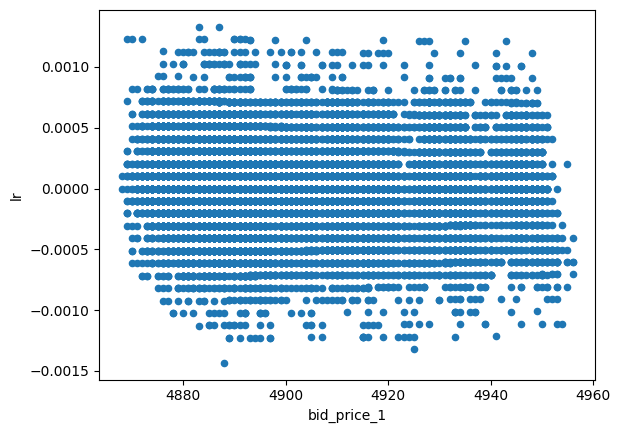

In [20]:
bnn_trn.plot.scatter(x='bid_price_1', y='lr')